# Machine Learning and AI for Autonomous Systems
## A program by IISc and TalentSprint
### Assignment : Markov Decision Process

## Learning Objectives

At the end of the experiment, you will be able to

* understand Markov Property and Markov Chain.
* understand and solve Markov Reward Process.
* understand theMarkov Decision Process.
* Apply MDP in grid search enviroment.
* Implementing both policy iteration and value iteration

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2302794" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9008710123" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "AIAS_B2_M3_AST_05_MDP_Value_Iteration_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aias-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Markov Decision Processes

The Markov Decision Process (MDP) is a mathematical framework for solving reinforcement learning (RL) problems. Almost all RL problems can be modeled as an MDP. MDPs are also widely used for solving other optimization problems.

In this section, we will define what an MDP is and how it is used in RL. To understand an MDP, we first need to understand the Markov property and Markov chains.

The Markov property states that the future state of a system depends only on its current state, not on its past history. This property is what makes MDPs so powerful for modeling RL problems.

A Markov chain is a stochastic process that satisfies the Markov property. In other words, a Markov chain is a sequence of states where the probability of transitioning to a particular state only depends on the current state, not on any previous states.

An MDP is a Markov chain with the addition of actions. In an MDP, the agent can take actions to influence the state transitions. The goal of the agent is to find a policy that maximizes the expected reward over time.

Moving from one state to another is called a transition, and its probability is called a transition probability. We denote the transition probability by $P(s'|s)$
. It indicates the probability of moving from the state $s$
 to the next state $s'$
.

### Markov Reward Process

The Markov Reward Process (MRP) is an extension of the Markov chain with the reward function. That is, we learned that the Markov chain consists of states and a transition probability. The MRP consists of states, a transition probability, and also a reward function.

A reward function tells us the reward we obtain in each state. For instance, based on our previous weather example, the reward function tells us the reward we obtain in the state cloudy, the reward we obtain in the state windy, and so on. The reward function is usually denoted by $R(s)$.

Thus, the MRP consists of states $s$, a transition probability $P(s'|s)$  function $R(s)$.

### MDP(markov Decision Process)

Markov decision process (MDP) is a mathematical tool used for decision-making problems where the outcomes are partially random and partially controllable.

**Agent:** A reinforcement learning agent is the entity which we are training to make correct decisions. For example, a robot that is being trained to move around a house without crashing.

**Environment:** The environment is the surroundings with which the agent interacts. For example, the house where the robot moves. The agent cannot manipulate the environment; it can only control its own actions. In other words, the robot can’t control where a table is in the house, but it can walk around it. In this notebook we are considering the **GRID WORLD**

**State:** The state defines the current situation of the agent This can be the exact position of the robot in the house, the alignment of its two legs or its current posture. It all depends on how you address the problem.

**Action:** The choice that the agent makes at the current time step. For example, the robot can move its right or left leg, raise its arm, lift an object or turn right/left, etc. We know the set of actions (decisions) that the agent can perform in advance.

**Policy:** A policy is the thought process behind picking an action. In practice, it’s a probability distribution assigned to the set of actions. Highly rewarding actions will have a high probability and vice versa. If an action has a low probability, it doesn’t mean it won’t be picked at all. It’s just less likely to be picked.

### Importing Libraries and Packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from time import time

### GRID WORLD

In [5]:
class GridWorld:
    def __init__(self, filename, reward, random_rate, time_limit=1000):
        file = open(filename)
        self.map = np.array(
            [list(map(float, s.strip().split(","))) for s in file.readlines()]
        )
        file.close()
        self.num_rows = self.map.shape[0]
        self.num_cols = self.map.shape[1]
        self.num_states = self.num_rows * self.num_cols
        self.num_actions = 4
        self.reward = reward
        self.random_rate = random_rate
        self.time_limit = time_limit
        self.reward_function = self.get_reward_function()
        self.transition_model = self.get_transition_model()

    def get_state_from_pos(self, pos):
        return pos[0] * self.num_cols + pos[1]

    def get_pos_from_state(self, state):
        return state // self.num_cols, state % self.num_cols

    def get_reward_function(self):
        reward_table = np.zeros(self.num_states)
        for r in range(self.num_rows):
            for c in range(self.num_cols):
                s = self.get_state_from_pos((r, c))
                reward_table[s] = self.reward[self.map[r, c]]
        return reward_table

    def get_transition_model(self):
        transition_model = np.zeros((self.num_states, self.num_actions, self.num_states))
        for r in range(self.num_rows):
            for c in range(self.num_cols):
                s = self.get_state_from_pos((r, c))
                neighbor_s = np.zeros(self.num_actions)
                if self.map[r, c] == 0:
                    for a in range(self.num_actions):
                        new_r, new_c = r, c
                        if a == 0:
                            new_r = max(r - 1, 0)
                        elif a == 1:
                            new_c = min(c + 1, self.num_cols - 1)
                        elif a == 2:
                            new_r = min(r + 1, self.num_rows - 1)
                        elif a == 3:
                            new_c = max(c - 1, 0)
                        if self.map[new_r, new_c] == 3:
                            new_r, new_c = r, c
                        s_prime = self.get_state_from_pos((new_r, new_c))
                        neighbor_s[a] = s_prime
                else:
                    neighbor_s = np.ones(self.num_actions) * s
                for a in range(self.num_actions):
                    transition_model[s, a, int(neighbor_s[a])] += 1 - self.random_rate
                    transition_model[s, a, int(neighbor_s[(a + 1) % self.num_actions])] += self.random_rate / 2.0
                    transition_model[s, a, int(neighbor_s[(a - 1) % self.num_actions])] += self.random_rate / 2.0
        return transition_model

    def generate_random_policy(self):
        return np.random.randint(self.num_actions, size=self.num_states)

    def execute_policy(self, policy, start_pos):
        s = self.get_state_from_pos(start_pos)
        r = self.reward_function[s]
        total_reward = r

        start_time = int(round(time() * 1000))
        overtime = False

        while r != self.reward[1] and r != self.reward[2]:
            s = np.random.choice(self.num_states, p=self.transition_model[s, policy[s]])
            r = self.reward_function[s]
            total_reward += r
            cur_time = int(round(time() * 1000)) - start_time
            if cur_time > self.time_limit:
                overtime = True
                break
        if overtime is True:
            return float('-inf')
        else:
            return total_reward

    def random_start_policy(self, policy, start_pos, n=100, plot=True):
        start_time = int(round(time() * 1000))
        overtime = False
        scores = np.zeros(n)
        i = 0
        while i < n:
            temp = self.execute_policy(policy=policy, start_pos=start_pos)
            print(f'i = {i} Random start result: {temp}')
            if temp > float('-inf'):
                scores[i] = temp
                i += 1
            cur_time = int(round(time() * 1000)) - start_time
            if cur_time > n * self.time_limit:
                overtime = True
                break

        print(f'max = {np.max(scores)}')
        print(f'min = {np.min(scores)}')
        print(f'mean = {np.mean(scores)}')
        print(f'std = {np.std(scores)}')

        if overtime is False and plot is True:
            bins = 100
            fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
            ax.set_xlabel('Total rewards in a single game')
            ax.set_ylabel('Frequency')
            ax.hist(scores, bins=bins, color='#1f77b4', edgecolor='black')
            plt.show()

        if overtime is True:
            print('Overtime!')
            return None
        else:
            return np.max(scores), np.min(scores), np.mean(scores)

    def blackbox_move(self, s, a):
        temp = self.transition_model[s, a]
        s_prime = np.random.choice(self.num_states, p=temp)
        r = self.reward_function[s_prime]
        return s_prime, r

    def plot_map(self, fig_size=(8, 6)):
        unit = min(fig_size[1] // self.num_rows, fig_size[0] // self.num_cols)
        unit = max(1, unit)
        fig, ax = plt.subplots(1, 1, figsize=fig_size)
        ax.axis('off')
        for i in range(self.num_cols + 1):
            if i == 0 or i == self.num_cols:
                ax.plot([i * unit, i * unit], [0, self.num_rows * unit],
                        color='black')
            else:
                ax.plot([i * unit, i * unit], [0, self.num_rows * unit],
                        alpha=0.7, color='grey', linestyle='dashed')
        for i in range(self.num_rows + 1):
            if i == 0 or i == self.num_rows:
                ax.plot([0, self.num_cols * unit], [i * unit, i * unit],
                        color='black')
            else:
                ax.plot([0, self.num_cols * unit], [i * unit, i * unit],
                        alpha=0.7, color='grey', linestyle='dashed')

        for i in range(self.num_rows):
            for j in range(self.num_cols):
                y = (self.num_rows - 1 - i) * unit
                x = j * unit
                if self.map[i, j] == 3:
                    rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='black',
                                             alpha=0.6)
                    ax.add_patch(rect)
                elif self.map[i, j] == 2:
                    rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='red',
                                             alpha=0.6)
                    ax.add_patch(rect)
                elif self.map[i, j] == 1:
                    rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='green',
                                             alpha=0.6)
                    ax.add_patch(rect)

        plt.tight_layout()
        plt.show()

    def plot_policy(self, policy, fig_size=(8, 6)):
        unit = min(fig_size[1] // self.num_rows, fig_size[0] // self.num_cols)
        unit = max(1, unit)
        fig, ax = plt.subplots(1, 1, figsize=fig_size)
        ax.axis('off')
        for i in range(self.num_cols + 1):
            if i == 0 or i == self.num_cols:
                ax.plot([i * unit, i * unit], [0, self.num_rows * unit],
                        color='black')
            else:
                ax.plot([i * unit, i * unit], [0, self.num_rows * unit],
                        alpha=0.7, color='grey', linestyle='dashed')
        for i in range(self.num_rows + 1):
            if i == 0 or i == self.num_rows:
                ax.plot([0, self.num_cols * unit], [i * unit, i * unit],
                        color='black')
            else:
                ax.plot([0, self.num_cols * unit], [i * unit, i * unit],
                        alpha=0.7, color='grey', linestyle='dashed')

        for i in range(self.num_rows):
            for j in range(self.num_cols):
                y = (self.num_rows - 1 - i) * unit
                x = j * unit
                if self.map[i, j] == 3:
                    rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='black',
                                             alpha=0.6)
                    ax.add_patch(rect)
                elif self.map[i, j] == 2:
                    rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='red',
                                             alpha=0.6)
                    ax.add_patch(rect)
                elif self.map[i, j] == 1:
                    rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='green',
                                             alpha=0.6)
                    ax.add_patch(rect)
                s = self.get_state_from_pos((i, j))
                if self.map[i, j] == 0:
                    a = policy[s]
                    symbol = ['^', '>', 'v', '<']
                    ax.plot([x + 0.5 * unit], [y + 0.5 * unit], marker=symbol[a],
                            linestyle='none', markersize=max(fig_size)*unit, color='#1f77b4')

        plt.tight_layout()
        plt.show()

    def visualize_value_policy(self, policy, values, fig_size=(8, 6)):
        unit = min(fig_size[1] // self.num_rows, fig_size[0] // self.num_cols)
        unit = max(1, unit)
        fig, ax = plt.subplots(1, 1, figsize=fig_size)
        ax.axis('off')

        for i in range(self.num_cols + 1):
            if i == 0 or i == self.num_cols:
                ax.plot([i * unit, i * unit], [0, self.num_rows * unit],
                        color='black')
            else:
                ax.plot([i * unit, i * unit], [0, self.num_rows * unit],
                        alpha=0.7, color='grey', linestyle='dashed')
        for i in range(self.num_rows + 1):
            if i == 0 or i == self.num_rows:
                ax.plot([0, self.num_cols * unit], [i * unit, i * unit],
                        color='black')
            else:
                ax.plot([0, self.num_cols * unit], [i * unit, i * unit],
                        alpha=0.7, color='grey', linestyle='dashed')

        for i in range(self.num_rows):
            for j in range(self.num_cols):
                y = (self.num_rows - 1 - i) * unit
                x = j * unit
                s = self.get_state_from_pos((i, j))
                if self.map[i, j] == 3:
                    rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='black',
                                             alpha=0.6)
                    ax.add_patch(rect)
                elif self.map[i, j] == 2:
                    rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='red',
                                             alpha=0.6)
                    ax.add_patch(rect)
                elif self.map[i, j] == 1:
                    rect = patches.Rectangle((x, y), unit, unit, edgecolor='none', facecolor='green',
                                             alpha=0.6)
                    ax.add_patch(rect)
                if self.map[i, j] != 3:
                    ax.text(x + 0.5 * unit, y + 0.5 * unit, f'{values[s]:.4f}',
                            horizontalalignment='center', verticalalignment='center',
                            fontsize=max(fig_size)*unit*0.6)
                if policy is not None:
                    if self.map[i, j] == 0:
                        a = policy[s]
                        symbol = ['^', '>', 'v', '<']
                        ax.plot([x + 0.5 * unit], [y + 0.5 * unit], marker=symbol[a], alpha=0.4,
                                linestyle='none', markersize=max(fig_size)*unit, color='#1f77b4')

        plt.tight_layout()
        plt.show()


#### Loading Data and creating Gridworld

In [6]:
!gdown "1dbTpjYl6eF28JiWYKmlHkpa_Ey0Jgiwk"

Downloading...
From: https://drive.google.com/uc?id=1dbTpjYl6eF28JiWYKmlHkpa_Ey0Jgiwk
To: /content/world00.csv
100% 24.0/24.0 [00:00<00:00, 90.5kB/s]


#### Plot the Gridworld

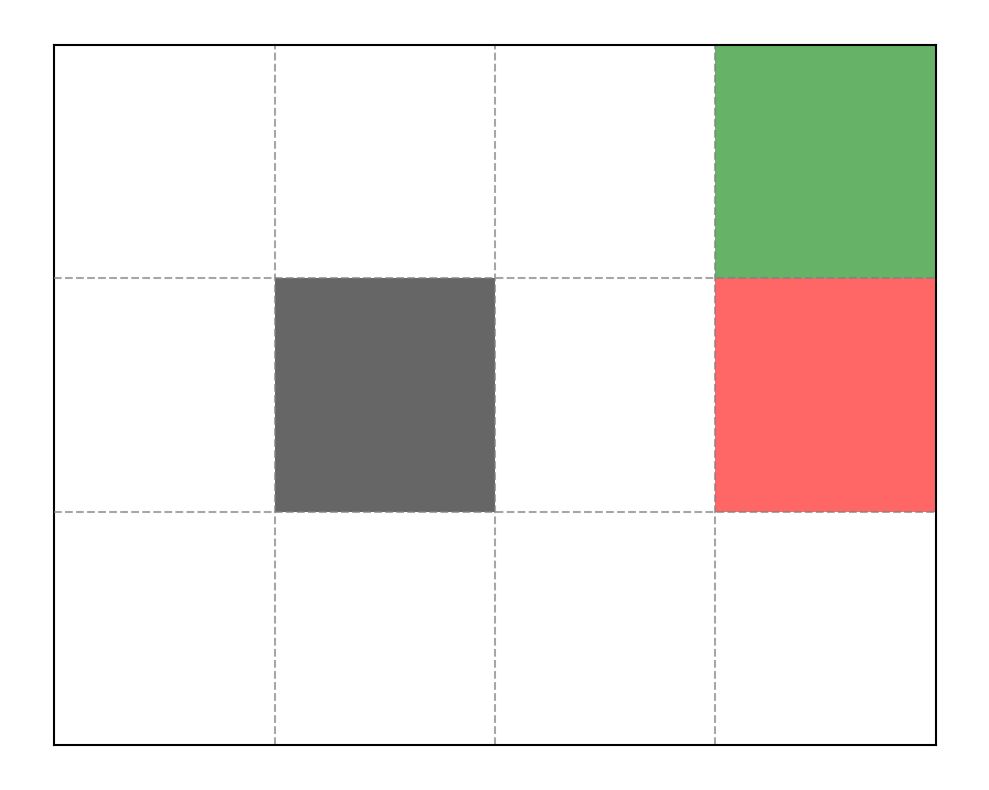

In [7]:
mdp = GridWorld('/content/world00.csv', reward={0: -0.04, 1: 1.0, 2: -1.0, 3: np.NaN}, random_rate=0.2)

mdp.plot_map(fig_size=(10, 8))

#### Generate random policy

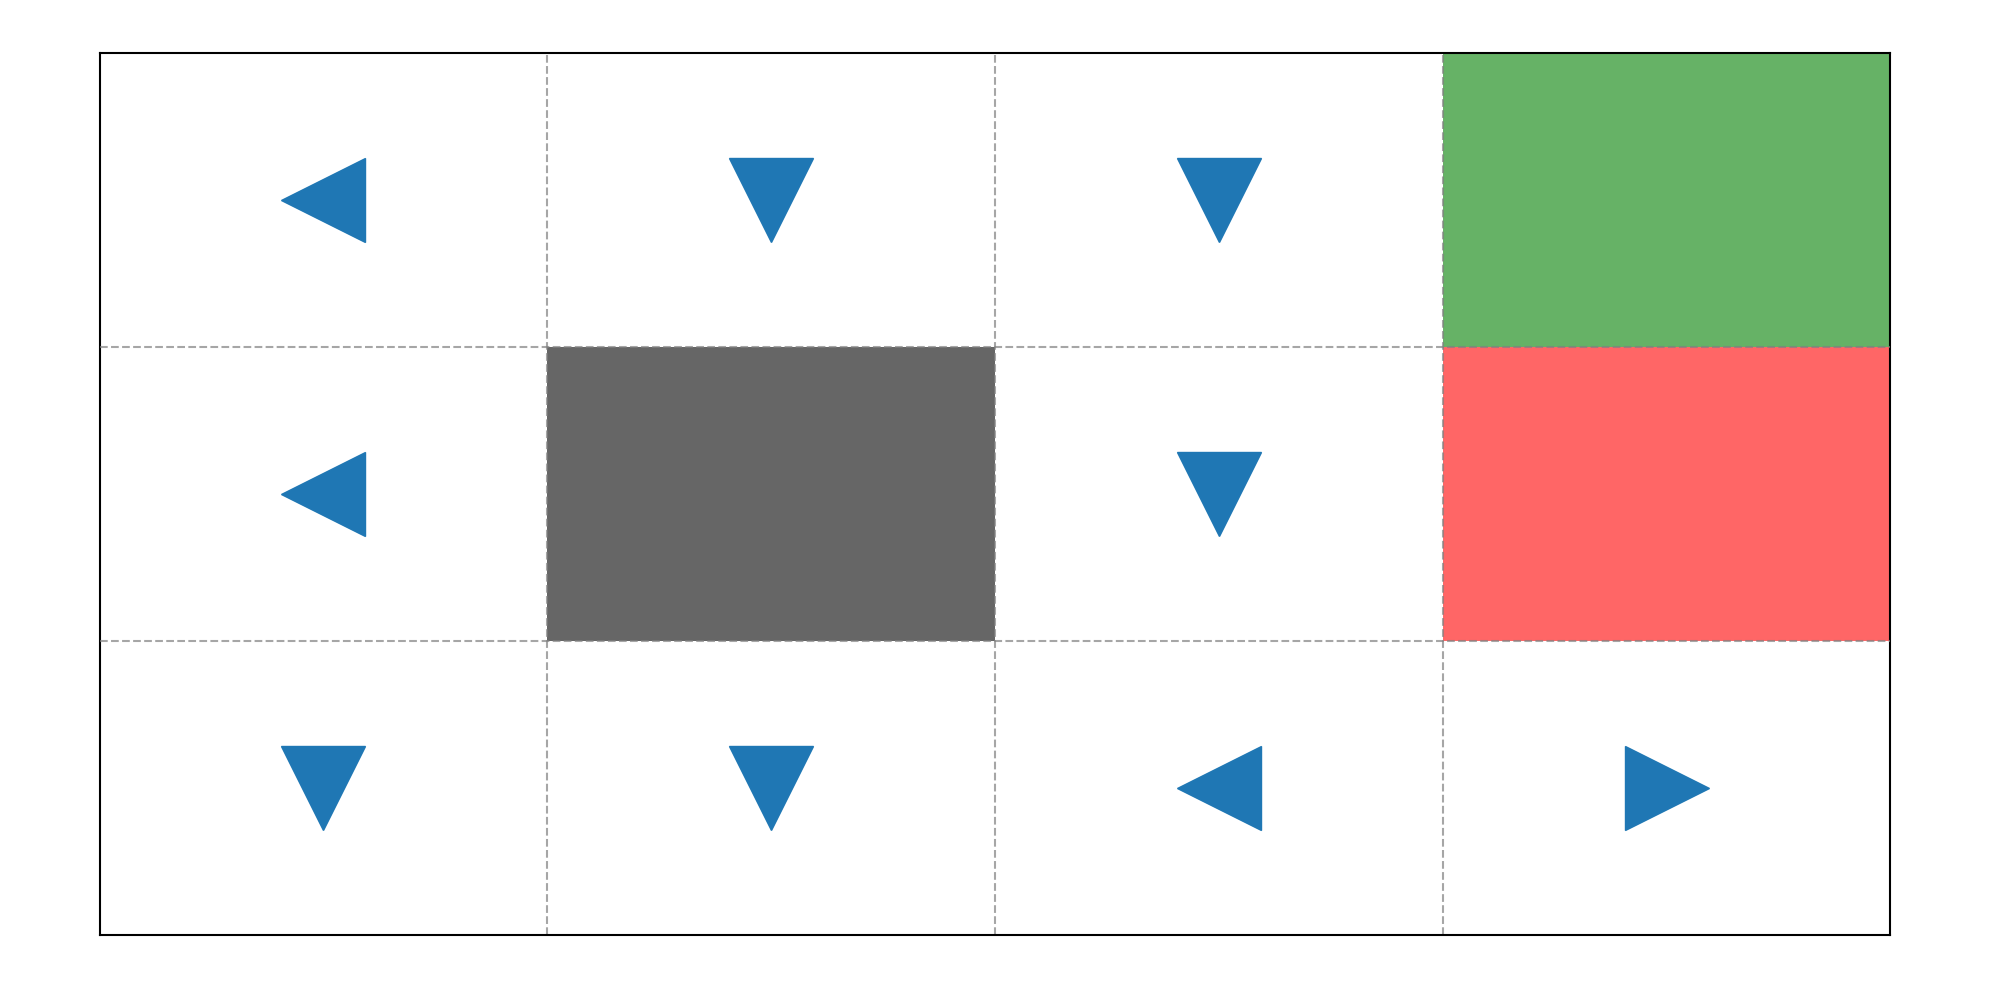

<ipython-input-5-ece47fdee11e>:261: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


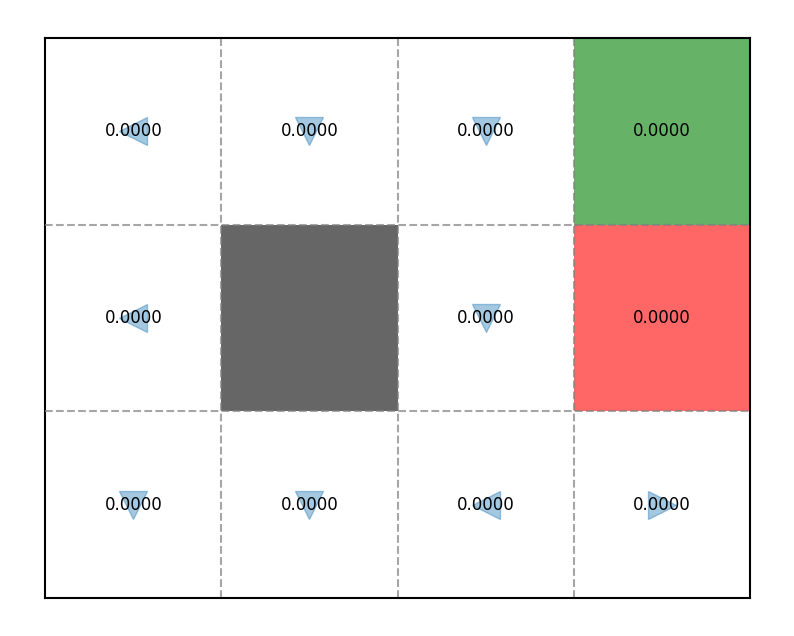

In [8]:
init_policy = mdp.generate_random_policy()
mdp.plot_policy(init_policy, fig_size=(20, 10))
mdp.visualize_value_policy(init_policy, np.zeros(mdp.num_states), fig_size=(10, 8))

#### Print the reward function

In [9]:
reward_function = mdp.reward_function
print(f'reward function =')
for s in range(len(reward_function)):
    print(f'State s = {s}, Reward R({s}) = {reward_function[s]}')

reward function =
State s = 0, Reward R(0) = -0.04
State s = 1, Reward R(1) = -0.04
State s = 2, Reward R(2) = -0.04
State s = 3, Reward R(3) = 1.0
State s = 4, Reward R(4) = -0.04
State s = 5, Reward R(5) = nan
State s = 6, Reward R(6) = -0.04
State s = 7, Reward R(7) = -1.0
State s = 8, Reward R(8) = -0.04
State s = 9, Reward R(9) = -0.04
State s = 10, Reward R(10) = -0.04
State s = 11, Reward R(11) = -0.04


#### Define transition model

In [10]:
transition_model = mdp.transition_model
print(f'transition model =')
for s in range(transition_model.shape[0]):
    print('======================================')
    for a in range(transition_model.shape[1]):
        print('--------------------------------------')
        for s_prime in range(transition_model.shape[2]):
            print(f's = {s}, a = {a}, s\' = {s_prime}, p = {transition_model[s, a, s_prime]}')

transition model =
--------------------------------------
s = 0, a = 0, s' = 0, p = 0.9
s = 0, a = 0, s' = 1, p = 0.1
s = 0, a = 0, s' = 2, p = 0.0
s = 0, a = 0, s' = 3, p = 0.0
s = 0, a = 0, s' = 4, p = 0.0
s = 0, a = 0, s' = 5, p = 0.0
s = 0, a = 0, s' = 6, p = 0.0
s = 0, a = 0, s' = 7, p = 0.0
s = 0, a = 0, s' = 8, p = 0.0
s = 0, a = 0, s' = 9, p = 0.0
s = 0, a = 0, s' = 10, p = 0.0
s = 0, a = 0, s' = 11, p = 0.0
--------------------------------------
s = 0, a = 1, s' = 0, p = 0.1
s = 0, a = 1, s' = 1, p = 0.8
s = 0, a = 1, s' = 2, p = 0.0
s = 0, a = 1, s' = 3, p = 0.0
s = 0, a = 1, s' = 4, p = 0.1
s = 0, a = 1, s' = 5, p = 0.0
s = 0, a = 1, s' = 6, p = 0.0
s = 0, a = 1, s' = 7, p = 0.0
s = 0, a = 1, s' = 8, p = 0.0
s = 0, a = 1, s' = 9, p = 0.0
s = 0, a = 1, s' = 10, p = 0.0
s = 0, a = 1, s' = 11, p = 0.0
--------------------------------------
s = 0, a = 2, s' = 0, p = 0.1
s = 0, a = 2, s' = 1, p = 0.1
s = 0, a = 2, s' = 2, p = 0.0
s = 0, a = 2, s' = 3, p = 0.0
s = 0, a = 2, s' = 4

#### Policy:
 A policy is the thought process behind picking an action. In practice, it’s a probability distribution assigned to the set of actions. Highly rewarding actions will have a high probability and vice versa. If an action has a low probability, it doesn’t mean it won’t be picked at all. It’s just less likely to be picked.

 Policy iteration is a dynamic programming algorithm for finding the optimal policy in a Markov decision process (MDP). It works by iteratively evaluating and improving the policy until convergence.

**Policy evaluation**

Policy evaluation takes a policy as input and computes the expected value of each state under that policy. This is done by recursively calculating the expected value of each state, taking into account the transition probabilities and rewards of the MDP.

**Policy improvement**

Policy improvement takes the value function as input and computes a new policy that is guaranteed to be at least as good as the old policy. This is done by choosing the action in each state that leads to the highest expected value.

**Policy iteration algorithm**

The policy iteration algorithm works as follows:

1. **Initialize the value function.** This can be done arbitrarily.
2. **Evaluate the policy.** Use the policy evaluation algorithm to compute the expected value of each state under the current policy.
3. **Improve the policy.** Use the policy improvement algorithm to compute a new policy that is guaranteed to be at least as good as the old policy.
4. **Repeat steps 2 and 3 until the policy converges.**

**Convergence**

The policy iteration algorithm is guaranteed to converge to the optimal policy in a finite number of iterations. This is because a finite MDP has only a finite number of policies, and each policy iteration either improves the policy or leaves it unchanged.

**Example**

Suppose we have the following MDP:

```
State | Action | Transition probability | Reward
-------|--------|-------------------|-------
S1   | A     | 0.5, 0.5         | 1
S1   | B     | 0.5, 0.5         | 0
S2   | A     | 1             | 10
S2   | B     | 1             | 0
```

The optimal policy is to always go to state S2, regardless of the current state. This is because state S2 has a higher expected reward than state S1.

We can use policy iteration to find the optimal policy as follows:

1. **Initialize the value function.** We can initialize the value function to all zeros.
2. **Evaluate the policy.** We use the policy evaluation algorithm to compute the expected value of each state under the current policy.

```
State | Value
-------|-------
S1   | 0.5
S2   | 10
```

3. **Improve the policy.** We use the policy improvement algorithm to compute a new policy that is guaranteed to be at least as good as the old policy.

```
State | Action
-------|--------
S1   | A
S2   | A
```

4. **Repeat steps 2 and 3 until the policy converges.**

We can see that the policy has converged, since the new policy is the same as the old policy. Therefore, the optimal policy is to always go to state S2, regardless of the current state.

**Conclusion**

Policy iteration is a powerful algorithm for finding the optimal policy in an MDP. It is guaranteed to converge to the optimal policy in a finite number of iterations. Policy iteration is often used in reinforcement learning to train agents to learn how to behave optimally in complex environments.

In [11]:
class PolicyIteration:
    def __init__(self, reward_function, transition_model, gamma, init_policy=None, init_value=None):
        self.num_states = transition_model.shape[0]
        self.num_actions = transition_model.shape[1]
        self.reward_function = np.nan_to_num(reward_function)

        self.transition_model = transition_model
        self.gamma = gamma

        if init_value is None:
            self.values = np.zeros(self.num_states)
        else:
            self.values = init_value
        if init_policy is None:
            self.policy = np.random.randint(0, self.num_actions, self.num_states)
        else:
            self.policy = init_policy

    def one_policy_evaluation(self):
        delta = 0
        for s in range(self.num_states):
            temp = self.values[s]
            a = self.policy[s]
            p = self.transition_model[s, a]
            self.values[s] = self.reward_function[s] + self.gamma * np.sum(p * self.values)
            delta = max(delta, abs(temp - self.values[s]))
        return delta

    def run_policy_evaluation(self, tol=1e-3):
        epoch = 0
        delta = self.one_policy_evaluation()
        delta_history = [delta]
        while epoch < 500:
            delta = self.one_policy_evaluation()
            delta_history.append(delta)
            if delta < tol:
                break
        return len(delta_history)

    def run_policy_improvement(self):
        update_policy_count = 0
        for s in range(self.num_states):
            temp = self.policy[s]
            v_list = np.zeros(self.num_actions)
            for a in range(self.num_actions):
                p = self.transition_model[s, a]
                v_list[a] = np.sum(p * self.values)
            self.policy[s] = np.argmax(v_list)
            if temp != self.policy[s]:
                update_policy_count += 1
        return update_policy_count

    def train(self, tol=1e-3, plot=True):
        epoch = 0
        eval_count_history = []
        policy_change_history = []
        while epoch < 500:
            epoch += 1
            eval_count = self.run_policy_evaluation(tol)
            policy_change = self.run_policy_improvement()
            eval_count_history.append(eval_count)
            policy_change_history.append(policy_change)
            if policy_change == 0:
                break


        if plot is True:
            fig, axes = plt.subplots(2, 1, figsize=(3.5, 4), sharex='all', dpi=200)
            axes[0].plot(np.arange(len(eval_count_history)), eval_count_history, marker='o', markersize=4, alpha=0.7,
                         color='#2ca02c', label='# sweep in \npolicy evaluation\n' + r'$\gamma =$' + f'{self.gamma}')
            axes[0].legend()

            axes[1].plot(np.arange(len(policy_change_history)), policy_change_history, marker='o',
                         markersize=4, alpha=0.7, color='#d62728',
                         label='# policy updates in \npolicy improvement\n' + r'$\gamma =$' + f'{self.gamma}')
            axes[1].set_xlabel('Epoch')
            axes[1].legend()
            plt.tight_layout()
            plt.show()

            print(f'# epoch: {len(policy_change_history)}')
            print(f'eval count = {eval_count_history}')
            print(f'policy change = {policy_change_history}')

Implementation of Policy iteration in MDP

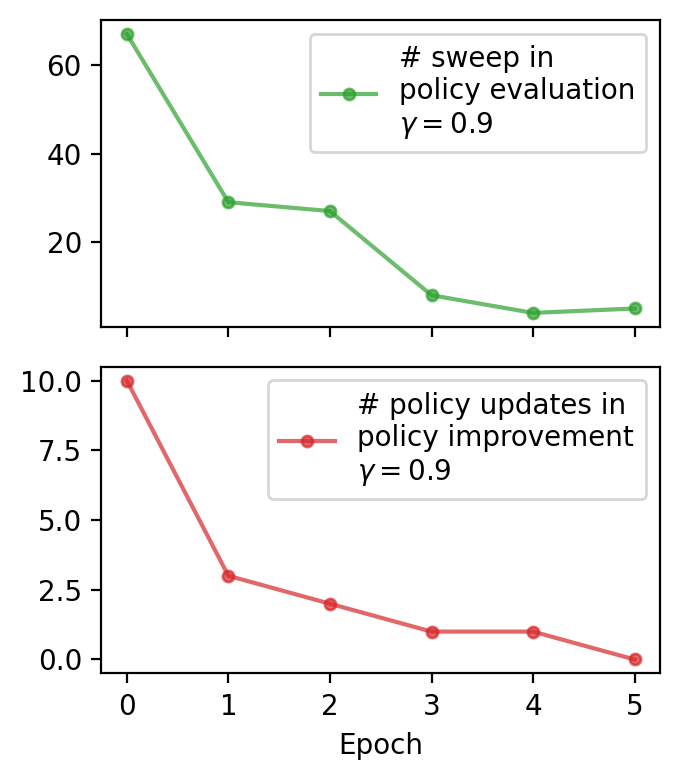

# epoch: 6
eval count = [67, 29, 27, 8, 4, 5]
policy change = [10, 3, 2, 1, 1, 0]


In [12]:
mdp = GridWorld('/content/world00.csv', reward={0: -0.04, 1: 1.0, 2: -1.0, 3: np.NaN}, random_rate=0.2)
#policy = [1, 1, 3, 1, 0, 0, 2, 0, 1, 2, 1, 0]

solverP = PolicyIteration(mdp.reward_function, mdp.transition_model, gamma=0.9, init_policy=None)
solverP.train()

<ipython-input-5-ece47fdee11e>:261: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


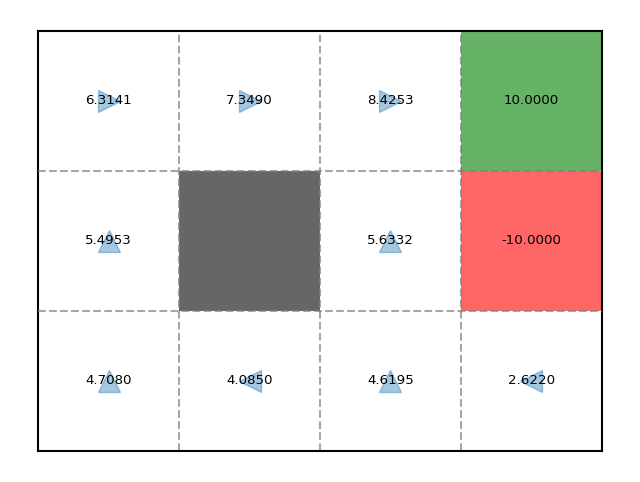

In [13]:
mdp.visualize_value_policy(policy=solverP.policy, values=solverP.values)

i = 0 Random start result: 0.64
i = 1 Random start result: 0.4800000000000001
i = 2 Random start result: 0.72
i = 3 Random start result: 0.6000000000000001
i = 4 Random start result: 0.76
i = 5 Random start result: 0.76
i = 6 Random start result: 0.72
i = 7 Random start result: 0.6799999999999999
i = 8 Random start result: 0.6799999999999999
i = 9 Random start result: 0.76
i = 10 Random start result: 0.6000000000000001
i = 11 Random start result: 0.72
i = 12 Random start result: 0.64
i = 13 Random start result: 0.76
i = 14 Random start result: 0.6799999999999999
i = 15 Random start result: 0.72
i = 16 Random start result: 0.76
i = 17 Random start result: 0.6799999999999999
i = 18 Random start result: 0.76
i = 19 Random start result: 0.76
i = 20 Random start result: 0.6000000000000001
i = 21 Random start result: 0.6799999999999999
i = 22 Random start result: 0.6799999999999999
i = 23 Random start result: 0.6000000000000001
i = 24 Random start result: 0.72
i = 25 Random start result: 0.6

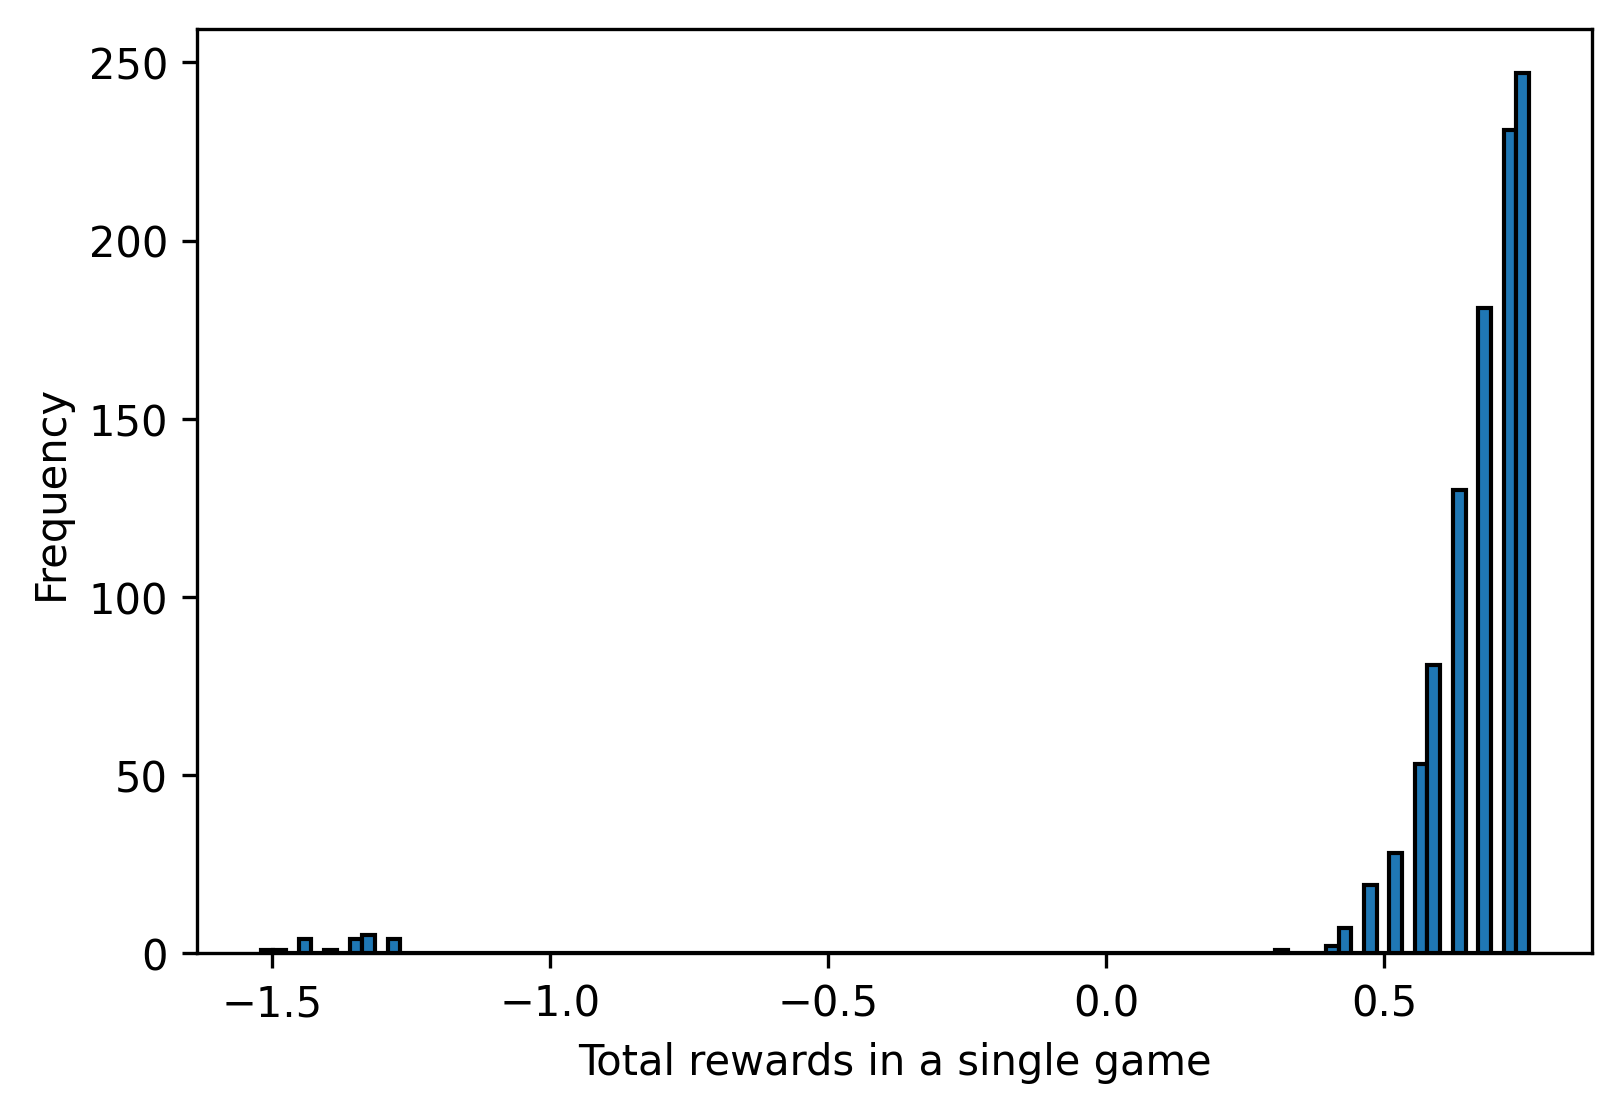

(0.76, -1.52, 0.63916)

In [14]:
mdp.random_start_policy(policy=solverP.policy, start_pos=(2, 1), n=1000)

### Value Iteration
Value iteration is a dynamic programming algorithm for finding the optimal value function in a Markov decision process (MDP). It works by iteratively updating the value function until it converges to the optimal value function.

**Bellman equation**

The Bellman equation is a recursive equation that defines the optimal value function of an MDP. It can be expressed as follows:

```
V*(s) = max_a(R(s, a) + sum_s' P(s' | s, a) * V*(s'))
```

where:

* $V*(s)$ is the optimal value of state $s$
* $R(s, a)$ is the reward for taking action $a$ in state $s$
* $P(s' | s, a)$ is the probability of transitioning to state $s'$ after taking action $a$ in state $s$
* $V*(s')$ is the optimal value of state $s'$

**Value iteration algorithm**

The value iteration algorithm works as follows:

1. **Initialize the value function.** This can be done arbitrarily.
2. **Iterate over all states.**
    * For each state $s$:
        * Update the value of state $s$ using the Bellman equation:

        ```
        V(s) = max_a(R(s, a) + sum_s' P(s' | s, a) * V(s'))
        ```

3. **Repeat steps 2 until the value function converges.**

**Convergence**

The value iteration algorithm is guaranteed to converge to the optimal value function in a finite number of iterations. This is because the Bellman equation is a contraction mapping on the set of all possible value functions.

**Example**

Suppose we have the same MDP as in the previous example:

```
State | Action | Transition probability | Reward
-------|--------|-------------------|-------
S1   | A     | 0.5, 0.5         | 1
S1   | B     | 0.5, 0.5         | 0
S2   | A     | 1             | 10
S2   | B     | 1             | 0
```

We can use value iteration to find the optimal value function as follows:

1. **Initialize the value function.** We can initialize the value function to all zeros.
2. **Iterate over all states.**

```
State | Value
-------|-------
S1   | 0
S2   | 0
```

3. **Update the value of state S1.**

```
State | Value
-------|-------
S1   | 0.5
S2   | 0
```

4. **Update the value of state S2.**

```
State | Value
-------|-------
S1   | 0.5
S2   | 10
```

5. **Repeat steps 3 and 4 until the value function converges.**

We can see that the value function has converged, since the value of both states has remained the same. Therefore, the optimal value function is as follows:

```
State | Value
-------|-------
S1   | 0.5
S2   | 10
```

**Conclusion**

Value iteration is a powerful algorithm for finding the optimal value function in an MDP. It is guaranteed to converge to the optimal value function in a finite number of iterations. Value iteration is often used in reinforcement learning to train agents to learn how to behave optimally in complex environments.

**Comparison of value iteration and policy iteration**

Value iteration and policy iteration are both dynamic programming algorithms for finding the optimal policy in an MDP. However, they work in different ways.

Value iteration iteratively updates the value function until it converges to the optimal value function. Policy iteration iteratively evaluates and improves the policy until it converges to the optimal policy.

Value iteration is generally faster than policy iteration, but it may not converge to the optimal policy as quickly. Policy iteration is guaranteed to converge to the optimal policy, but it may be slower than value iteration.

In practice, both value iteration and policy iteration are used to find the optimal policy in MDPs. The choice of algorithm depends on the specific problem and the desired trade-off between speed and accuracy.

In [15]:
class ValueIteration:
    def __init__(self, reward_function, transition_model, gamma):
        self.num_states = transition_model.shape[0]
        self.num_actions = transition_model.shape[1]
        self.reward_function = np.nan_to_num(reward_function)
        self.transition_model = transition_model
        self.gamma = gamma
        self.values = np.zeros(self.num_states)
        self.policy = None

    def one_iteration(self):
        delta = 0
        for s in range(self.num_states):
            temp = self.values[s]
            v_list = np.zeros(self.num_actions)
            for a in range(self.num_actions):
                p = self.transition_model[s, a]
                v_list[a] = self.reward_function[s] + self.gamma * np.sum(p * self.values)

            self.values[s] = max(v_list)
            delta = max(delta, abs(temp - self.values[s]))
        return delta

    def get_policy(self):
        pi = np.ones(self.num_states) * -1
        for s in range(self.num_states):
            v_list = np.zeros(self.num_actions)
            for a in range(self.num_actions):
                p = self.transition_model[s, a]
                v_list[a] = self.reward_function[s] + self.gamma * np.sum(p * self.values)

            max_index = []
            max_val = np.max(v_list)
            for a in range(self.num_actions):
                if v_list[a] == max_val:
                    max_index.append(a)
            pi[s] = np.random.choice(max_index)
        return pi.astype(int)

    def train(self, tol=1e-3, plot=True):
        epoch = 0
        delta = self.one_iteration()
        delta_history = [delta]
        while delta > tol:
            epoch += 1
            delta = self.one_iteration()
            delta_history.append(delta)
            if delta < tol:
                break
        self.policy = self.get_policy()

        # print(f'# iterations of policy improvement: {len(delta_history)}')
        # print(f'delta = {delta_history}')

        if plot is True:
            fig, ax = plt.subplots(1, 1, figsize=(3, 2), dpi=200)
            ax.plot(np.arange(len(delta_history)) + 1, delta_history, marker='o', markersize=4,
                    alpha=0.7, color='#2ca02c', label=r'$\gamma= $' + f'{self.gamma}')
            ax.set_xlabel('Iteration')
            ax.set_ylabel('Delta')
            ax.legend()
            plt.tight_layout()
            plt.show()


#### Implementation of value iteration

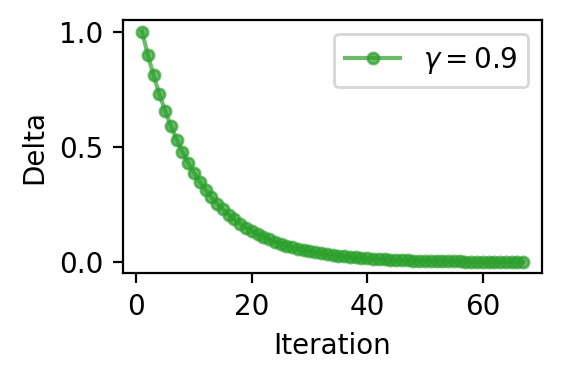

In [16]:
problem = GridWorld('/content/world00.csv', reward={0: -0.04, 1: 1.0, 2: -1.0, 3: np.NaN}, random_rate=0.2)

solverV = ValueIteration(problem.reward_function, problem.transition_model, gamma=0.9)
solverV.train()

<ipython-input-5-ece47fdee11e>:261: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


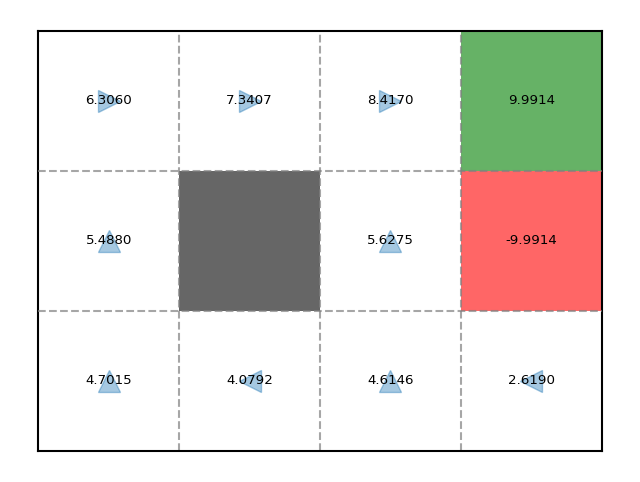

In [17]:
problem.visualize_value_policy(policy=solverV.policy, values=solverV.values)

i = 0 Random start result: 0.52
i = 1 Random start result: 0.6799999999999999
i = 2 Random start result: 0.8
i = 3 Random start result: 0.76
i = 4 Random start result: 0.6799999999999999
i = 5 Random start result: 0.8
i = 6 Random start result: 0.72
i = 7 Random start result: 0.8
i = 8 Random start result: 0.8
i = 9 Random start result: 0.6799999999999999
i = 10 Random start result: 0.76
i = 11 Random start result: 0.76
i = 12 Random start result: 0.76
i = 13 Random start result: 0.56
i = 14 Random start result: 0.6799999999999999
i = 15 Random start result: 0.8
i = 16 Random start result: 0.76
i = 17 Random start result: 0.8
i = 18 Random start result: 0.8
i = 19 Random start result: 0.8
i = 20 Random start result: 0.6799999999999999
i = 21 Random start result: 0.6799999999999999
i = 22 Random start result: 0.8
i = 23 Random start result: 0.8
i = 24 Random start result: 0.8
i = 25 Random start result: 0.76
i = 26 Random start result: 0.76
i = 27 Random start result: 0.72
i = 28 Random

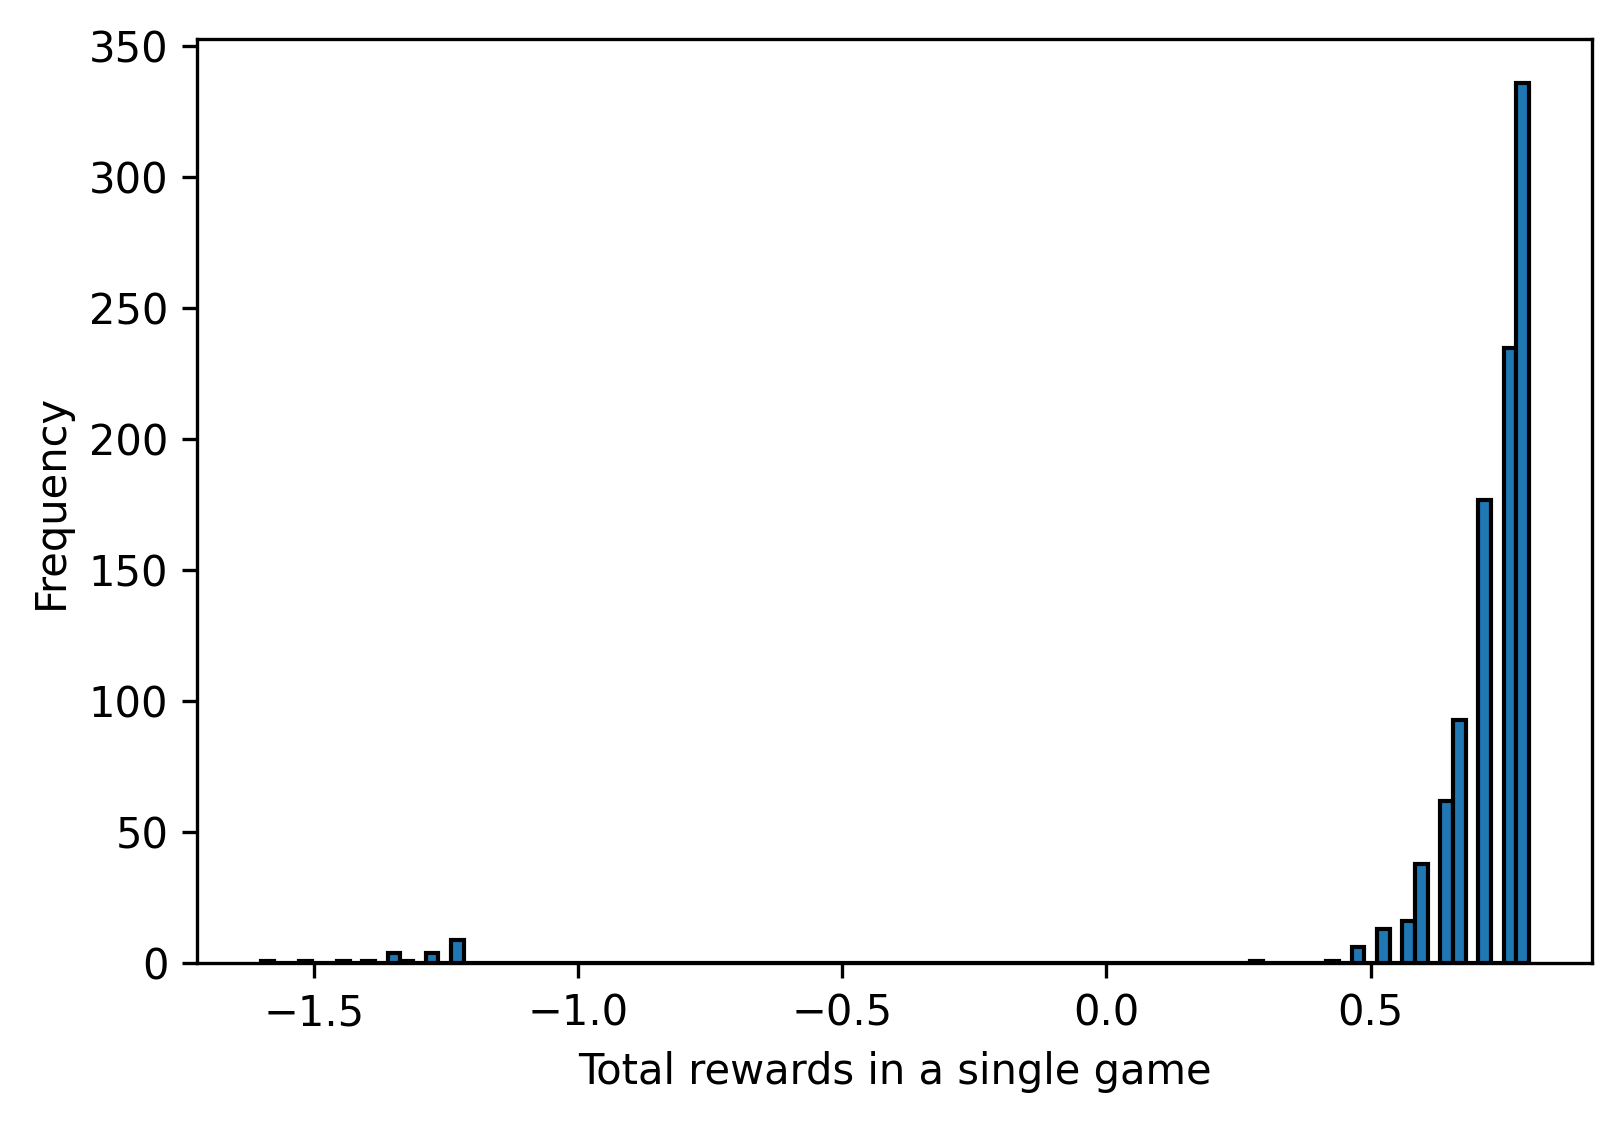

(0.8, -1.6, 0.69088)

In [18]:
problem.random_start_policy(policy=solverV.policy, start_pos=(2, 0), n=1000)

### Comparision between value iteration and policy iteration


**Value iteration** and **policy iteration** are both dynamic programming algorithms for finding the optimal policy in a Markov decision process (MDP). They are both guaranteed to converge to the optimal policy in a finite number of iterations, but they have different strengths and weaknesses.

**Value iteration** works by iteratively updating the value function until it converges to the optimal value function. The value function of a state is the expected reward that can be accumulated from that state by following the optimal policy.

**Policy iteration** works by iteratively evaluating and improving the policy until it converges to the optimal policy. Policy evaluation computes the expected reward that can be accumulated from each state under the current policy. Policy improvement then chooses the best action to take in each state, based on the expected rewards.

**Comparison of value iteration and policy iteration:**

| Characteristic | Value iteration | Policy iteration |
|---|---|---|
| Speed | Faster | Slower |
| Accuracy | May not converge to the optimal policy as quickly | Guaranteed to converge to the optimal policy |
| Memory requirements | Less memory required | More memory required |
| Suitable for | Problems where speed is more important than accuracy | Problems where accuracy is more important than speed |

**Examples:**

* **Value iteration is suitable for problems where the state space is large and the transition probabilities are complex.** In these problems, it can be difficult to evaluate the policy accurately, but value iteration can still converge to the optimal policy relatively quickly.
* **Policy iteration is suitable for problems where the state space is small and the transition probabilities are simple.** In these problems, it is easy to evaluate the policy accurately, and policy iteration can converge to the optimal policy relatively quickly.

**Conclusion:**

Value iteration and policy iteration are both powerful algorithms for finding the optimal policy in an MDP. The choice of algorithm depends on the specific problem and the desired trade-off between speed and accuracy.

**Additional considerations:**

* **Value iteration is often used in conjunction with policy iteration.** Policy iteration can be used to initialize the value function for value iteration, which can help to speed up convergence.
* **Some variants of policy iteration can be even faster than value iteration.** For example, **optimistic policy iteration** starts with an optimistic value function, which allows it to converge more quickly.

In general, value iteration is a good choice for problems where speed is more important than accuracy. Policy iteration is a good choice for problems where accuracy is more important than speed.

### Import the grid world map

In [19]:
!gdown "1ijOW8crvoIs1soeelWaaSleIYM1Sn_tV"

Downloading...
From: https://drive.google.com/uc?id=1ijOW8crvoIs1soeelWaaSleIYM1Sn_tV
To: /content/world02.csv
100% 1.22k/1.22k [00:00<00:00, 5.74MB/s]


#### Print the Map

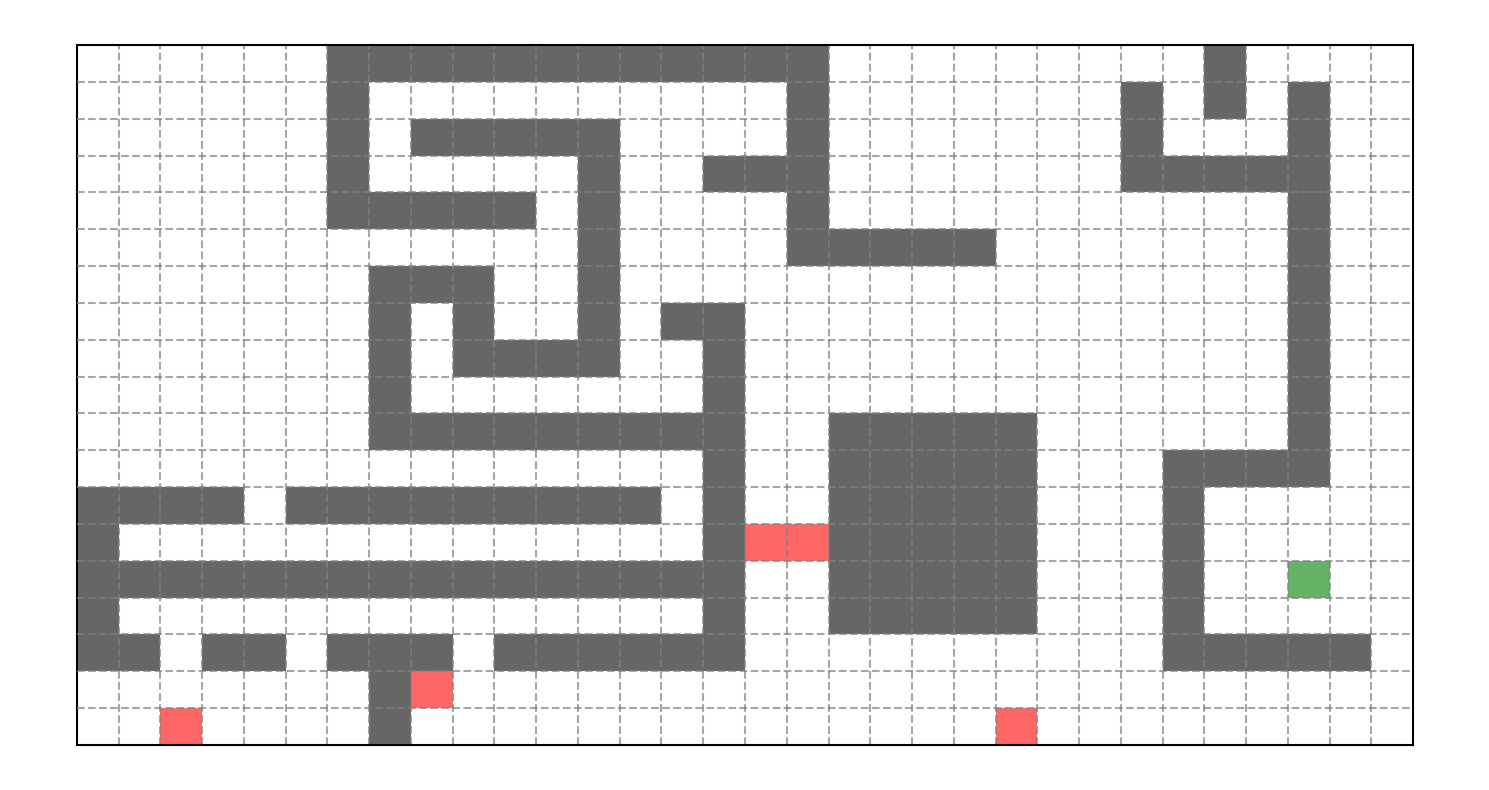

In [20]:
problem = GridWorld('/content/world02.csv', reward={0: -0.04, 1: 10.0, 2: -2.5, 3: np.NaN}, random_rate=0.2)
problem.plot_map(fig_size=(15, 8))

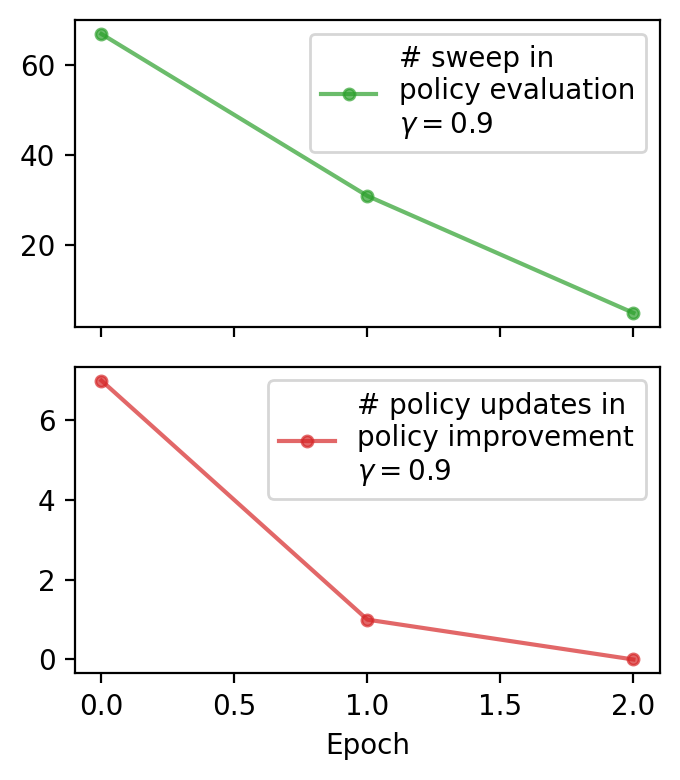

# epoch: 3
eval count = [67, 31, 5]
policy change = [7, 1, 0]


<ipython-input-5-ece47fdee11e>:261: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


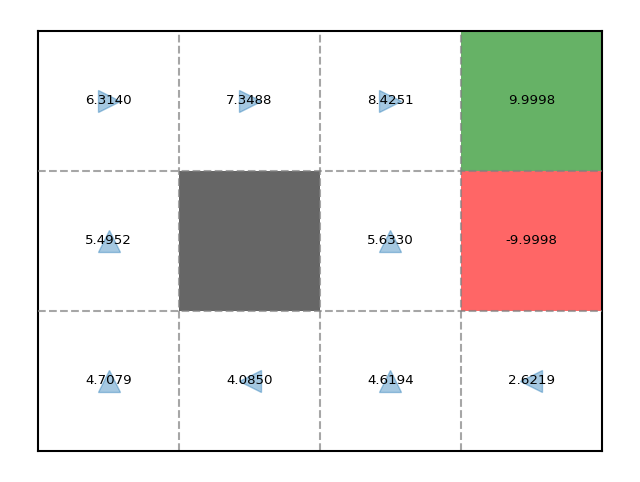

i = 0 Random start result: 0.31999999999999995
i = 1 Random start result: 0.6000000000000001
i = 2 Random start result: 0.6799999999999999
i = 3 Random start result: 0.64
i = 4 Random start result: 0.6799999999999999
i = 5 Random start result: 0.76
i = 6 Random start result: 0.6799999999999999
i = 7 Random start result: 0.64
i = 8 Random start result: 0.64
i = 9 Random start result: 0.6799999999999999
i = 10 Random start result: 0.72
i = 11 Random start result: 0.76
i = 12 Random start result: 0.72
i = 13 Random start result: 0.76
i = 14 Random start result: 0.6799999999999999
i = 15 Random start result: 0.52
i = 16 Random start result: 0.44000000000000006
i = 17 Random start result: 0.72
i = 18 Random start result: 0.6799999999999999
i = 19 Random start result: 0.76
i = 20 Random start result: 0.6000000000000001
i = 21 Random start result: 0.64
i = 22 Random start result: 0.6799999999999999
i = 23 Random start result: 0.6799999999999999
i = 24 Random start result: 0.76
i = 25 Random s

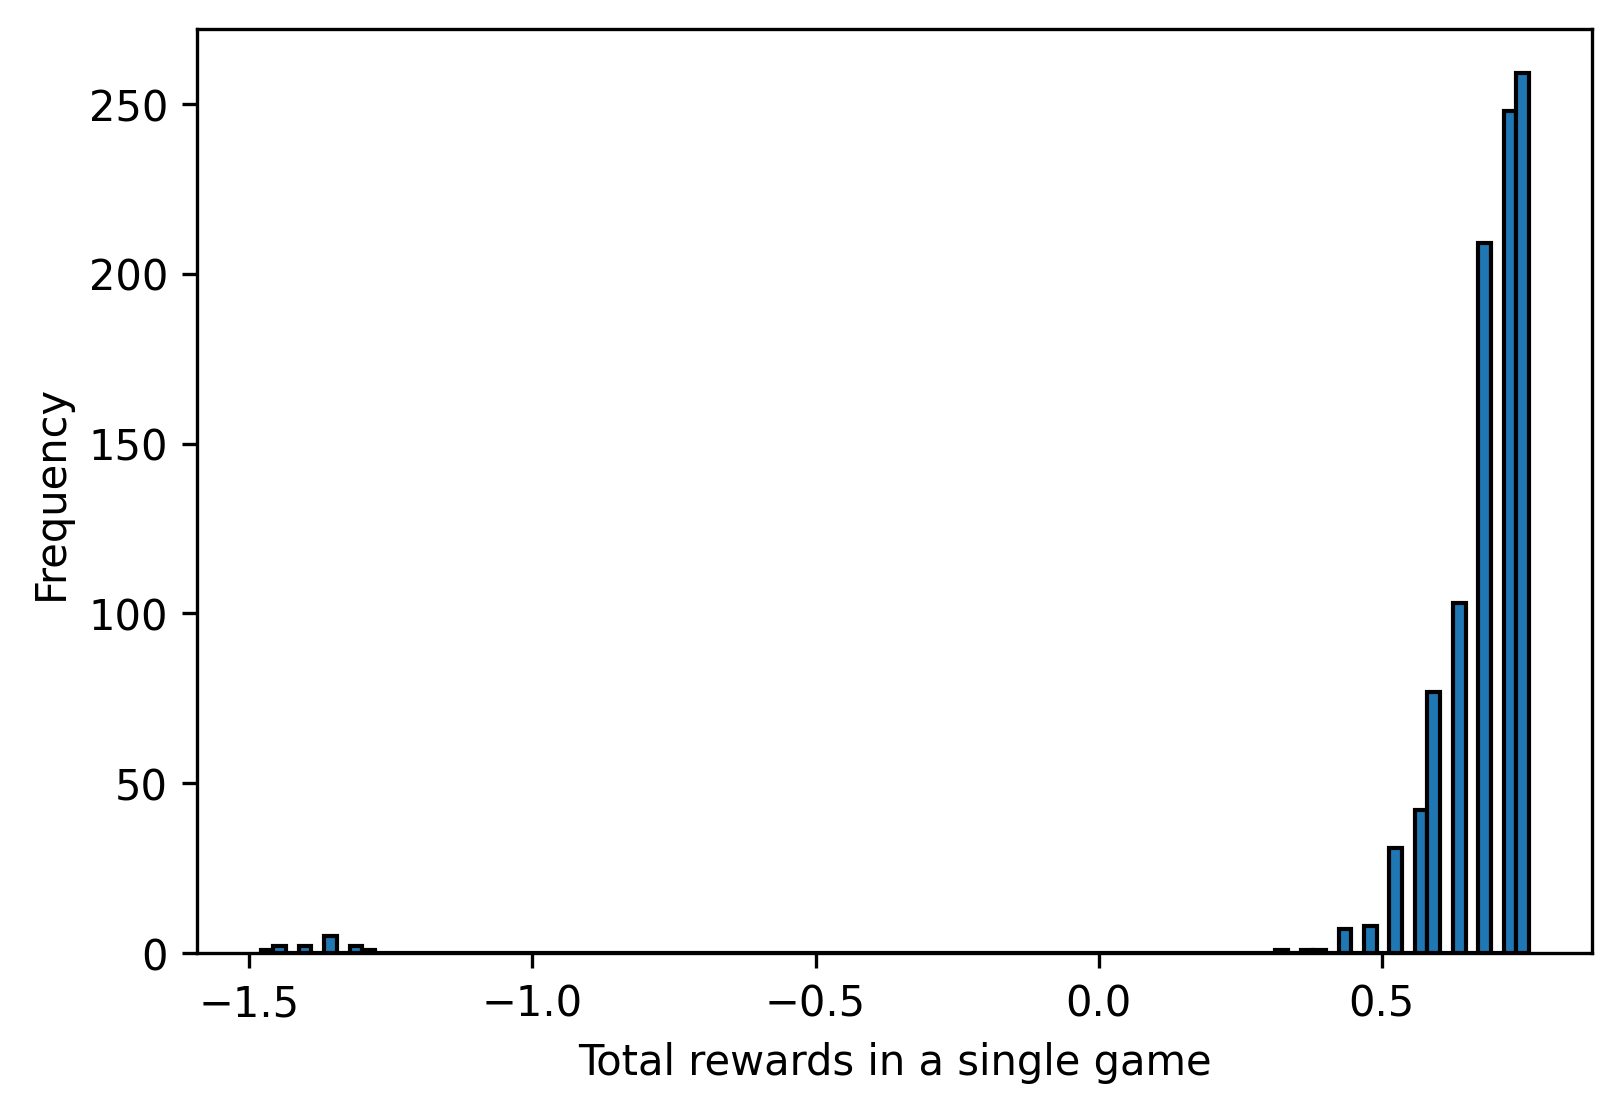

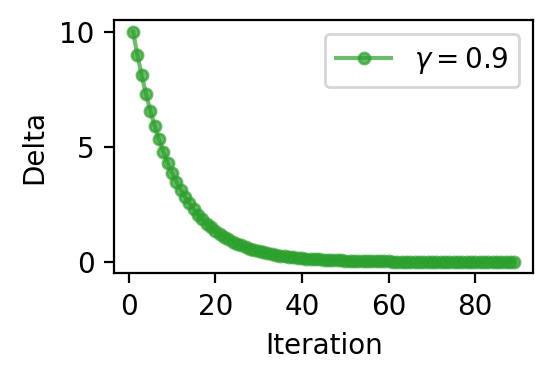

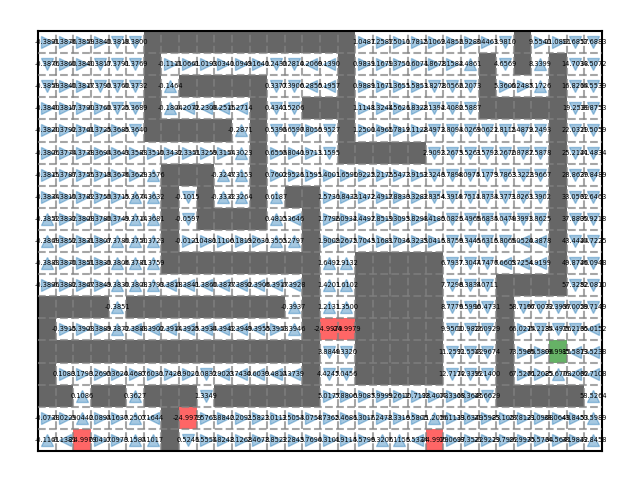

i = 0 Random start result: 6.679999999999998
i = 1 Random start result: 6.679999999999998
i = 2 Random start result: 6.639999999999998
i = 3 Random start result: 6.2399999999999975
i = 4 Random start result: 6.879999999999998
i = 5 Random start result: 6.359999999999998
i = 6 Random start result: 6.279999999999998
i = 7 Random start result: 6.639999999999998
i = 8 Random start result: 6.919999999999998
i = 9 Random start result: 6.919999999999998
i = 10 Random start result: 5.999999999999997
i = 11 Random start result: 6.719999999999998
i = 12 Random start result: 5.879999999999997
i = 13 Random start result: 6.759999999999998
i = 14 Random start result: 6.639999999999998
i = 15 Random start result: 6.639999999999998
i = 16 Random start result: 6.879999999999998
i = 17 Random start result: 6.719999999999998
i = 18 Random start result: 6.399999999999998
i = 19 Random start result: 6.639999999999998
i = 20 Random start result: 6.759999999999998
i = 21 Random start result: 6.8799999999999

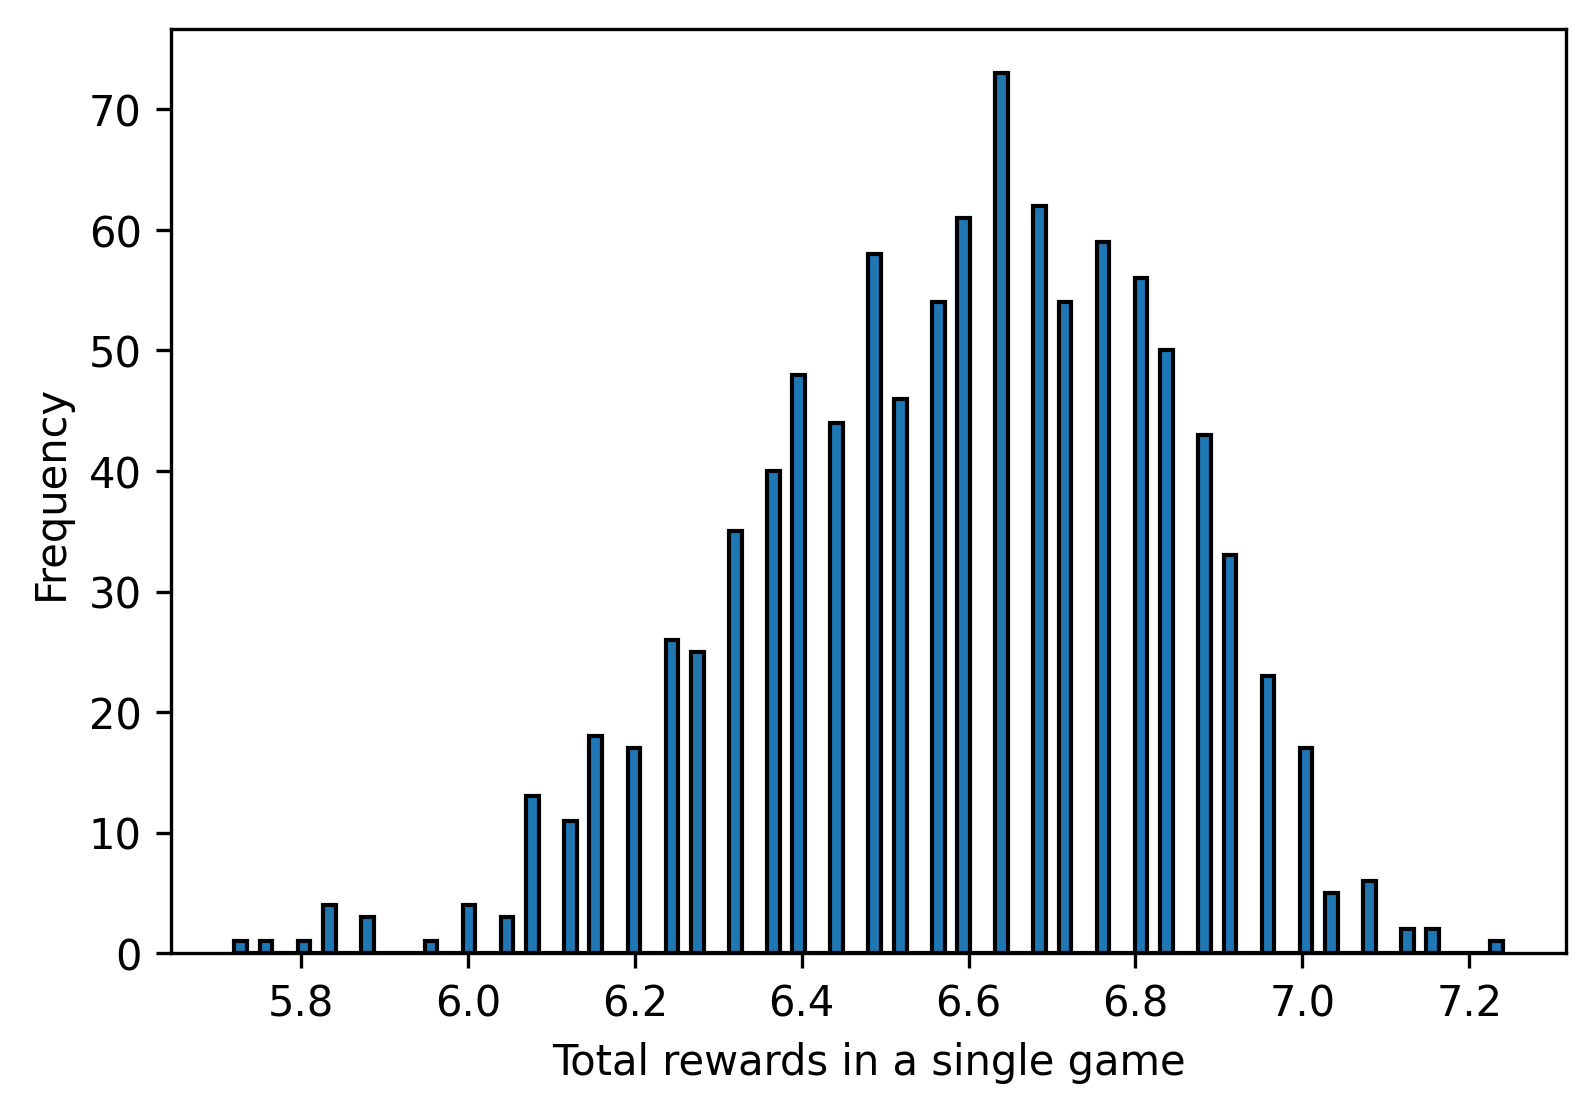

(7.239999999999998, 5.719999999999997, 6.587159999999998)

In [21]:
# Implement the policy iteration and value iteration
# YOUR CODE HERE

solverP = PolicyIteration(mdp.reward_function, mdp.transition_model, gamma=0.9, init_policy=None)
solverP.train()
mdp.visualize_value_policy(policy=solverP.policy, values=solverP.values)
mdp.random_start_policy(policy=solverP.policy, start_pos=(2, 1), n=1000)

solverV = ValueIteration(problem.reward_function, problem.transition_model, gamma=0.9)
solverV.train()

problem.visualize_value_policy(policy=solverV.policy, values=solverV.values)
problem.random_start_policy(policy=solverV.policy, start_pos=(2, 0), n=1000)

### Please answer the questions below to complete the experiment:


In [22]:
# @title  For an MDP if we only change the reward function R(others remain same) the optimal policy is guaranteed to remain the same?  { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "FALSE" #@param ["","TRUE", "FALSE"]

In [23]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [24]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Good & challenging" #@param {type:"string"}


In [25]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [26]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")